In [434]:
import pandas as pd
import numpy as np

In [435]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [437]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [438]:
df.shape

(891, 12)

In [439]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [440]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [441]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [442]:
df['Age'].mode()

0    24.0
dtype: float64

In [443]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [444]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [445]:
df['Embarked'] = df['Embarked'].fillna('NA')

In [446]:
df['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [447]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [448]:
df['Cabin'].value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [449]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [450]:
Survival = df.groupby('Age', as_index=False)['Survived'].sum()

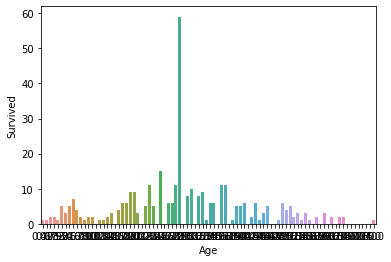

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(x='Age', y='Survived', data=Survival)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


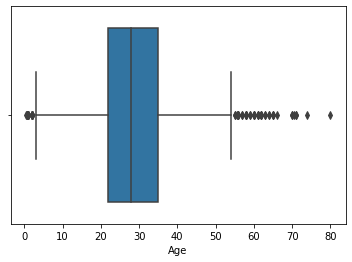

In [452]:
box = sns.boxplot(df['Age'])

In [453]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [454]:
dfclean = df.drop(columns=['PassengerId','Name','Embarked','Ticket','Parch','SibSp','Fare'])
dfclean.shape

(891, 5)

In [455]:
dfclean = pd.get_dummies(dfclean)

In [456]:
dfclean.head()

,Survived,Pclass,Age,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,...,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,3,22.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [457]:
dfclean.shape

(891, 152)

In [458]:
input_columns = [column for column in dfclean.columns if column != 'Survived']
output_column = 'Survived'

In [459]:
x = dfclean.loc[:,input_columns].values
y = dfclean.loc[:,output_column]

print(x.shape, y.shape)

(891, 151) (891,)


In [460]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [461]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05, random_state = 100,stratify=y)

In [462]:
#

In [463]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(846, 151)
(846,)
(45, 151)
(45,)


In [464]:
y_train.value_counts()

0    521
1    325
Name: Survived, dtype: int64

In [465]:
y_test.value_counts()

0    28
1    17
Name: Survived, dtype: int64

In [466]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [467]:
logreg = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [468]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [469]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test,  y_test_pred))

0.8309692671394799
0.8222222222222222


In [470]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

0.820513804813229
0.8224789915966386


In [471]:
train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_TP = train_confusion[1, 1]
train_TN = train_confusion[0, 0]
train_FP = train_confusion[0, 1]
train_FN = train_confusion[1, 0]

In [472]:
print(train_confusion)

[[451  70]
 [ 73 252]]


In [473]:
test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_TP = test_confusion[1, 1]
test_TN = test_confusion[0, 0]
test_FP = test_confusion[0, 1]
test_FN = test_confusion[1, 0]

In [474]:
print(test_confusion)

[[23  5]
 [ 3 14]]


In [475]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred)

In [476]:
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred)

No handles with labels found to put in legend.


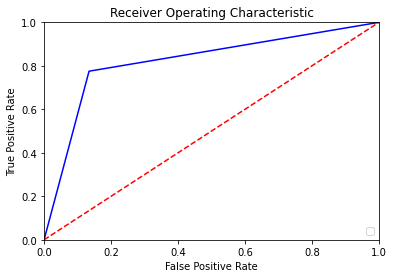

In [477]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

No handles with labels found to put in legend.


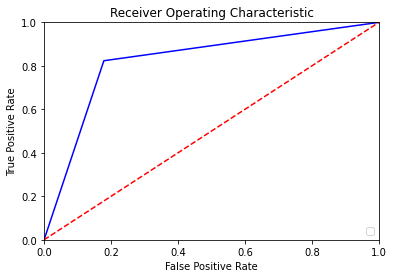

In [478]:
plt.title('Receiver Operating Characteristic')
plt.plot(test_fpr, test_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()